# Notebook: Frequency Sort
## Author: Lincoln Steber
## Course: CS 2500 (Algorithms) @ Missouri S&T

### Prerequisite Packages

We will be using numpy, matplotlib library in this jupyter notebook.

In [18]:
# Install all the prerequisite packages from the Terminal
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Frequency Sort

In [20]:
def frequency_sort(A, B, k):
    C = [0] * (k + 1)
    
    for j in range(len(A)):
        C[A[j]] += 1

    D = [(i, C[i]) for i in range(len(C))]
    D.sort(key=lambda x: (-x[1], x[0]))

    for i in range(len(D)):
        B.extend([D[i][0]] * D[i][1])

## Test input for frequency_sort

In [21]:
array = [4, 0, 6, 1, 2, 4, 3, 2, 1, 4, 2, 1, 0]
emptyarray = []

print(f"Input : {array}")

array_out = frequency_sort(array, emptyarray, len(array) - 1)

print(f"\nOutput : {emptyarray}")

Input : [4, 0, 6, 1, 2, 4, 3, 2, 1, 4, 2, 1, 0]

Output : [1, 1, 1, 2, 2, 2, 4, 4, 4, 0, 0, 3, 6]


## Plotting Run-Time Complexity

In [22]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, size - 1, size = size)
    return arr

In [23]:
# Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
start_array = 10
end_array = 200
increments = 10

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        emptyarray = arr = [0] * len(array)
        start = time.time()                               # Record state time
        frequency_sort(array, emptyarray, len(array) - 1)
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(time_taken)

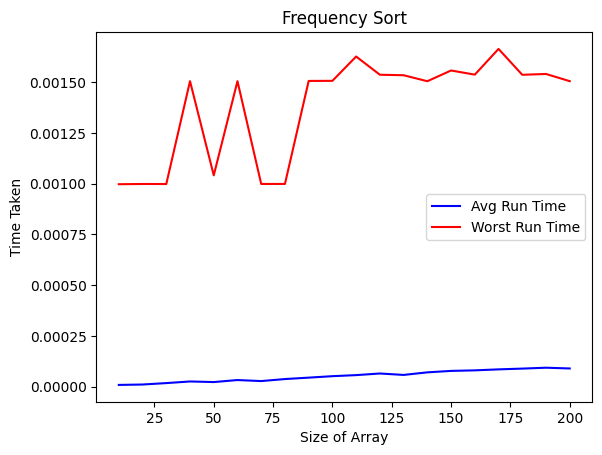

In [24]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Frequency Sort")

# Add Axes Labels
plt.xlabel("Size of Array") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()

### References
1. [Big o cheat sheet](https://www.bigocheatsheet.com/)
2. [Timeit example](https://www.geeksforgeeks.org/timeit-python-examples/)